In [10]:
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

In [3]:
X=np.empty((100,2))
X[:,0]=np.random.uniform(0.0, 100.0, size=100)
X[:,1]=0.75*X[:,0]+3.0+np.random.normal(0.0,10.0,size=100)

In [4]:
pca=PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pca.components_

array([[-0.77861805, -0.62749816]])

In [6]:
x_reduction=pca.transform(X)

In [7]:
x_reduction.shape

(100, 1)

In [8]:
x_resotre=pca.inverse_transform(x_reduction)

In [9]:
x_resotre.shape

(100, 2)

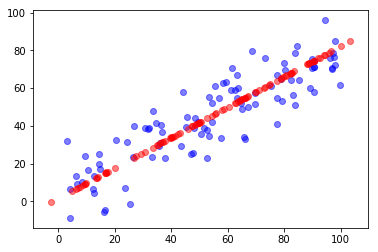

In [11]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(x_resotre[:,0], x_resotre[:,1], color='r', alpha=0.5)
plt.show()

In [12]:
from sklearn.datasets import load_digits

In [13]:
digits=load_digits()

X=digits.data
y=digits.target

In [14]:
X.shape

(1797, 64)

In [15]:
y.shape

(1797,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
X_train.shape

(1437, 64)

In [19]:
%%time

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 163 ms


In [20]:
knn_clf.score(X_test, y_test)

0.98611111111111116

In [21]:
pca=PCA(n_components=2)
pca.fit(X_train)
X_train_reduction=pca.transform(X_train)
X_test_reduction=pca.transform(X_test)

In [23]:
%%time

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 3 ms


In [24]:
knn_clf.score(X_test_reduction, y_test)

0.62222222222222223

## 可以看出，如果降维的太多，就会导致损失的信息太多，以致于最后的score很低

## 那么，如何确定该降维到多少呢。

In [25]:
pca.explained_variance_

array([ 176.72484853,  165.21973658])

In [26]:
pca.explained_variance_ratio_

array([ 0.14696354,  0.13739595])

In [27]:
pca=PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([  1.46963543e-01,   1.37395946e-01,   1.19011191e-01,
         8.47889974e-02,   5.76755055e-02,   4.90130189e-02,
         4.32187941e-02,   3.67391876e-02,   3.30822086e-02,
         3.06476012e-02,   2.33498916e-02,   2.24407063e-02,
         1.85731551e-02,   1.78633932e-02,   1.50121955e-02,
         1.41770686e-02,   1.29458858e-02,   1.22171177e-02,
         1.02130890e-02,   9.45906678e-03,   8.83276491e-03,
         7.77444297e-03,   7.68414481e-03,   7.41841093e-03,
         6.96688881e-03,   6.09580884e-03,   5.68799668e-03,
         5.09118362e-03,   4.85481149e-03,   4.25042434e-03,
         3.74694664e-03,   3.47324032e-03,   3.37075974e-03,
         3.21348349e-03,   3.08013786e-03,   2.96137896e-03,
         2.54468809e-03,   2.32186084e-03,   2.14276021e-03,
         2.10493483e-03,   1.81497965e-03,   1.65011676e-03,
         1.47912289e-03,   1.39911838e-03,   1.14835086e-03,
         1.05869744e-03,   9.66740228e-04,   6.69193484e-04,
         5.46665142e-04,

## 首先，不要降维，通过explained_variance_ratio_查看每个成分占原数据的比重
##  这个属性是从大到小排序的
## 从下图可以看出，特征越多，表达原数据就越多
## 差不多40多个维度的时候，就能够表达原始数据90%多的信息
## 因此，降维到40多，就差不多了

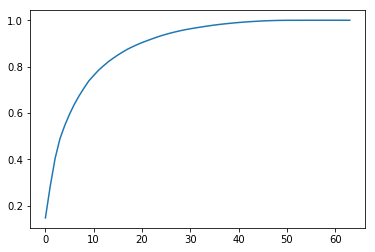

In [28]:
n_dim=X_train.shape[1]
plt.plot([i for i in range(n_dim)],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(n_dim)])
plt.show()

## sklearn的PCA提供方法，传入需要保留原始数据的多少，就可以了

In [29]:
pca=PCA(0.95)
pca.fit(X_train)
pca.explained_variance_ratio_

array([ 0.14696354,  0.13739595,  0.11901119,  0.084789  ,  0.05767551,
        0.04901302,  0.04321879,  0.03673919,  0.03308221,  0.0306476 ,
        0.02334989,  0.02244071,  0.01857316,  0.01786339,  0.0150122 ,
        0.01417707,  0.01294589,  0.01221712,  0.01021309,  0.00945907,
        0.00883276,  0.00777444,  0.00768414,  0.00741841,  0.00696689,
        0.00609581,  0.005688  ,  0.00509118])

In [30]:
pca.n_components

0.95

In [31]:
pca.n_components_

28

## 可以看出，28个维度，就能给保留原始的95%的信息

In [32]:
x_train_reduction=pca.transform(X_train)
x_test_reduction=pca.transform(X_test)

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
knn_clf.score(x_test_reduction, y_test)

0.98333333333333328

## 降维的另一个应用是：数据可视化

In [40]:
pca=PCA(n_components=2)
pca.fit(X)
X_reduction=pca.transform(X)

In [41]:
pca.explained_variance_ratio_

array([ 0.14890594,  0.13618771])

In [42]:
X_reduction.shape

(1797, 2)

In [43]:
y.shape

(1797,)

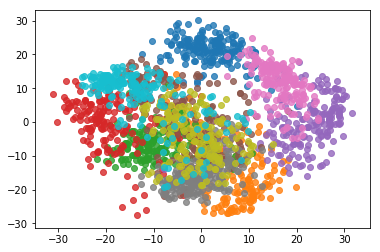

In [46]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()